#Predicting sentiment from product reviews

#Fire up GraphLab Create

In [1]:
#pip install --upgrade --no-cache-dir https://get.graphlab.com/GraphLab-Create/2.1/yuliya.karpievitch@uwa.edu.au/B432-855C-1247-4049-31BB-E8FB-8E59-FA76/GraphLab-Create-License.tar.gz


  Could not find a version that satisfies the requirement graphlab-create>=2.1 (from GraphLab-Create-License==2.1) (from versions: )
No matching distribution found for graphlab-create>=2.1 (from GraphLab-Create-License==2.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import graphlab
# Library has been renamed:
# https://apple.github.io/turicreate/docs/api/index.html
import turicreate

#Read some product review data

Loading reviews for a set of baby products. 

In [3]:
# products = graphlab.SFrame(')

products = turicreate.SFrame('amazon_baby.gl/') 

In [5]:
# add another column: 'word_count' - will tockenize the 'review'
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [51]:
# data had 3 columns, we added one more 
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1, 'moist':1, 'osocozy': 1, 'keps': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1,'comfortable': 1, 'bed': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1, 'clever': 1,'little': 1, 'loves': 1, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1, 'many': 1,'headaches': 1, 'soo' ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1, 'or': 1,'break': 1, 'trying': 1, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1, 'barnes': 1,'at': 1, 'is': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1, 'because':1, 'questions': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1, 'and': 1,'changes': 1, 'the': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1, 'pages': 1,'out': 1, 'run': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1,'recommend': 1, 'high ...",1


In [ ]:
len(products['name']) # how many reviews do we have?

In [44]:
# graphlab.canvas.set_target('ipynb')
# 
# 'auto', 'browser', 'gui', 'none', default: 'auto'
turicreate.visualization.set_target('gui')  # 'browser')

In [45]:
products['name'].show()

Materializing SArray

#Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [14]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [46]:
len(giraffe_reviews)

785

In [48]:
giraffe_reviews['rating'].show() # (view='Categorical')
# show does not have parameters...

Materializing SArray

#Build a sentiment classifier

In [49]:
products['rating'].show() # (view='Categorical')

Materializing SArray

##Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [21]:
# ignore all 3* reviews = remove products with rating  == 3
products = products[products['rating'] != 3]

In [50]:
len(products['name'])

166752

In [22]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [16]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'cute': 1,'help': 2, 'doll': 1, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'be': 1,'is': 1, 'it': 1, 'as': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'feeding,': 1, 'and': 2,'all': 1, 'right': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'all': 1,'standarad': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 1, 'forget': 1,'just': 1, ""daughter's"": ...",1


In [53]:
# cgeck if we have 0's and 1's
products['sentiment'].show()

Materializing SArray

##Let's train the sentiment classifier

In [54]:
# split data into a traning (80%) and testing (20%) data sets
train_data,test_data = products.random_split(.8, seed=0) 

In [25]:
# sentiment_model = graphlab.logistic_classifier.create(train_data,
#                                                     target='sentiment',
#                                                     features=['word_count'],
#                                                     validation_set=test_data)
sentiment_model = turicreate.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=['word_count'],
                                                     validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.869456     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 2.961836     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 3.688234     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 4.142091     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 4.705034     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 6.642239     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

#Evaluate the sentiment model

In [55]:
logRegsRes = sentiment_model.evaluate(test_data, metric='roc_curve')

In [57]:

logRegsRes

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   1e-05   | 0.847972972972973  | 0.9975693451529882 | 27976 | 5328 |
 |   2e-05   | 0.829954954954955  | 0.9971761509865599 | 27976 | 5328 |
 |   3e-05   | 0.818506006006006  | 0.9969616814412353 | 27976 | 5328 |
 |   4e-05   | 0.8109984984984985 | 0.9967472118959108 | 27976 | 5328 |
 |   5e-05   | 0.8057432432432432 | 0.9966042321990277 | 27976 | 5328 |
 |   6e-05   | 0.7991741741741741 | 0.9962825278810409 | 27976 | 5328 |
 |   7e-05   | 0.7952327327327328 | 0.9961752931083786 | 27976 | 5328 |
 |   8e-05   | 0.7920420420420421 | 0.9961038032599371 | 27976 | 5328 |
 |   9e-05   | 0.7882882882882

In [59]:
#sentiment_model.show(view='Evaluation')
# does nto work in turicreate, will use matlibplot
import matplotlib.pyplot as plt

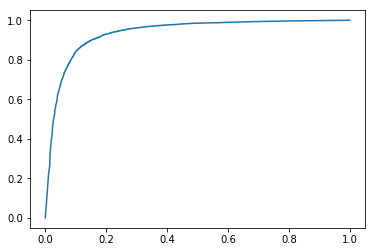

In [62]:
# plt.figure()
plt.plot(logRegsRes['roc_curve']['fpr'], logRegsRes['roc_curve']['tpr'])

#Applying the learned model to understand sentiment for Giraffe

In [30]:
# get predicted scores
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type='probability')


In [31]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1,'teething': 1, 'cranky': ...",0.9993655365682315
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1, 'is': 1, 'when':1, 'him': 1, 'help': 1, ...",0.9998633791689631
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1, 'of': 1,'packaging': 1, 'no': 1, ...",0.2545268197805444
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1, 'out': 1,'run': 1, 'lost': 1, ...",0.9165688083914822
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1,'will': 1, 'take': 1, ...",0.6855768205884137
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1, 'perfect': 1,'pack': 1, 'only': 1, ...",0.99999994452112
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1, 'in': 1,'other': 1, 'hours': 1, ...",0.997935118109351
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1, 'water': 1,'don': 1, 'up': 1, ...",0.9999745004834385
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1, 'fine': 1,'is': 1, 'which': 1, ...",0.9460144428356535
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1, 'have': 2,'of': 1, 'some': 1, ...",0.3830113614210665


##Sort the reviews based on the predicted sentiment and explore, hiher values on top

In [35]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [36]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'explore': 1,'adventures': 1, 'many': ...",1.0
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'use': 1, 'get': 1,'will': 1, 'where': 1, ...",1.0
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'09': 1, '11': 1,'recommended': 1, 'la': ...",1.0
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'parents': 1,'recommend': 1, 'happy': ...",0.9999999999998377
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'future': 1, 'use': 1,'am': 1, 'chewing': 1, ...",0.9999999999998284
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1, 'worth': 1,'definitely': 1, 'han ...",0.9999999999997958
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'teether': 1, 'want': 1,'price': 1, 'keepsake': ...",0.9999999999994914
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'must': 1, 'nuts': 1,'we': 1, 'theirs': 1, ...",0.9999999999941254
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'well': 1, 'natural': 1,'makers': 1, 'try': 1, ...",0.999999999987423
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1, 'of': 1,'cause': 1, 'fade': 1, ...",0.9999999999829475


##Most positive reviews for the giraffe

In [34]:
giraffe_reviews[0]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

In [37]:
giraffe_reviews[1]['review']

"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face another day of play

##Show most negative reviews for giraffe

In [27]:
# -1 is the last element
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [28]:
giraffe_reviews[-2]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."